In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from scipy.stats import mode
import csv
import matplotlib.dates
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from datetime import *

In [2]:
#导入训练数据
train_data = pd.read_csv('train_feature_set.csv')

print(train_data.head(10))

    cnt  day_of_week  week  day  guess_date  date_year  date_month  \
0    68            3     0    3  2013-01-02       2013           1   
1    36            4     0    4  2013-01-03       2013           1   
2  5565            5     0    5  2013-01-04       2013           1   
3  4966            6     0    6  2013-01-05       2013           1   
4  3346            7     0    7  2013-01-06       2013           1   
5  3396            1     1    8  2013-01-07       2013           1   
6  4146            2     1    9  2013-01-08       2013           1   
7  3096            3     1   10  2013-01-09       2013           1   
8  2713            4     1   11  2013-01-10       2013           1   
9  2409            5     1   12  2013-01-11       2013           1   

   date_property  week_scaled  day_scaled       ...         day_of_week_1  \
0              2     0.000000    0.000000       ...                     0   
1              2     0.000000    0.000664       ...                     0  

In [63]:
# 年份、月份与上排量均值关系分析
year_df = pd.pivot_table(train_data,index=["date_year"], values=["cnt"], aggfunc={"cnt":np.mean})
year_df

,cnt
date_year,
2013,1533.947531
2014,1601.865204
2015,1931.393548
2016,2654.708861


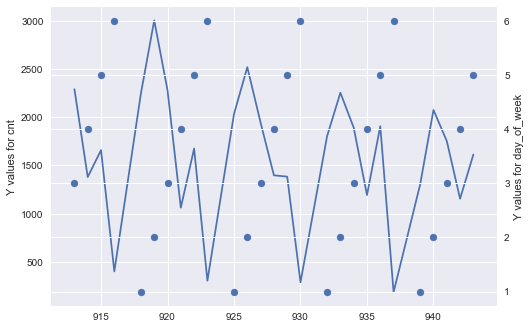

In [71]:
#分析每个月内上牌量的规律
def analyzeMonthLaw(df, date_year, date_month):
    drawDf = df[(df.date_year == date_year) & (df.date_month == date_month)][['cnt', 'day_of_week', 'day']]
    
    fig = plt.figure()
    x = drawDf['day']
    ax1 = fig.add_subplot(111)
    ax1.plot(x, drawDf['cnt'])
    ax1.set_ylabel('Y values for cnt')

    ax2 = ax1.twinx()  # this is the important function
    ax2.scatter(x, drawDf['day_of_week'])
    ax2.set_ylabel('Y values for day_of_week')

    plt.show()
    
analyzeMonthLaw(train_data, 2015, 7)

# train_data[(train_data.date_year == 2013) & (train_data.date_month == 1)][:]

In [60]:
#导入销售量比赛数据用于分析
sale_quantity_data = pd.read_csv('yancheng_train_20171226.csv')
sale_quantity_data_this_month = sale_quantity_data[(sale_quantity_data.sale_date >= 201301) & (sale_quantity_data.sale_date <= 201604)]
sale_quantity_data_last_month = sale_quantity_data[(sale_quantity_data.sale_date >= 201212) & (sale_quantity_data.sale_date <= 201603)]

sale_quantity_pivot_table_this_month = pd.pivot_table(sale_quantity_data_this_month, index=['sale_date'], values=['sale_quantity'], aggfunc={"sale_quantity":np.sum})
sale_quantity_pivot_table_last_month = pd.pivot_table(sale_quantity_data_last_month, index=['sale_date'], values=['sale_quantity'], aggfunc={"sale_quantity":np.sum})
card_amount_pivot_table = pd.pivot_table(train_data,index=["date_year", 'date_month'], values=["cnt"], aggfunc={"cnt":np.mean})
card_amount_pivot_table['sale_quantity'] = (sale_quantity_pivot_table_this_month['sale_quantity'].values.astype(int) + sale_quantity_pivot_table_last_month['sale_quantity'].values.astype(int))/2

card_amount_pivot_table

D:\win10-Application\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (15,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


cnt  sale_quantity
date_year date_month                            
2013      1           2500.142857        28137.0
          2           1873.045455        27651.5
          3           1257.821429        19561.0
          4           1277.678571        19842.5
          5           1748.666667        24504.5
          6           1191.555556        24199.5
          7           1246.666667        22034.5
          8           1328.392857        24549.5
          9           1552.259259        26979.5
          10          1535.115385        27573.0
          11          1447.592593        26107.5
          12          1534.769231        24977.5
2014      1           2760.807692        35114.5
          2           1709.916667        35448.0
          3           1412.321429        25103.0
          4           1482.250000        26728.5
          5           1334.892857        27835.0
          6           1288.384615        26257.5
          7           1501.333333        27222.0
          8           1313.481481        28805.5
          9           1901.846154        32452.0
          10          1676.520000        35867.5
          11          1408.269231        32328.5
          12          1509.892857        33354.0
2015      1           2935.714286        49593.5
          2           3097.550000        54335.0
          3           1919.807692        41630.0
          4           1587.148148        35806.0
          5           1722.320000        35841.0
          6           1609.840000        35566.5
          7           1593.074074        35497.0
          8           1524.035714        38515.5
          9           1916.960000        44014.0
          10          1828.200000        51901.0
          11          1853.615385        51814.0
          12          1821.428571        52992.5
2016      1           3153.653846        59277.5
          2           3062.142857        50378.5
          3           1958.740741        41868.5
          4           2107.200000        41163.0

In [7]:
#接下来利用A榜正确答案做误差分析
test_A_df = pd.read_csv('test_feature_set.csv')
self_predict = pd.read_csv('linear_keng_2_8.txt', sep='\t', header=None)
answer_predict = pd.read_csv('answer_A_20180225.txt', sep='\t', header=None)

test_A_df['predict_error'] = self_predict[:][1] - answer_predict[:][1]
print(test_A_df.head(10))

   day_of_week  week   day  guess_date  date_year  date_month  date_property  \
0            4   170  1194  2016-04-07       2016           4              0   
1            5   170  1195  2016-04-08       2016           4              0   
2            6   170  1196  2016-04-09       2016           4              1   
3            1   171  1198  2016-04-11       2016           4              0   
4            2   171  1199  2016-04-12       2016           4              0   
5            3   171  1200  2016-04-13       2016           4              0   
6            4   171  1201  2016-04-14       2016           4              0   
7            5   171  1202  2016-04-15       2016           4              0   
8            6   171  1203  2016-04-16       2016           4              1   
9            1   172  1205  2016-04-18       2016           4              0   

   sale_quantity dividedMonth  pre_date_property      ...        date_month_7  \
0        41163.0        early         

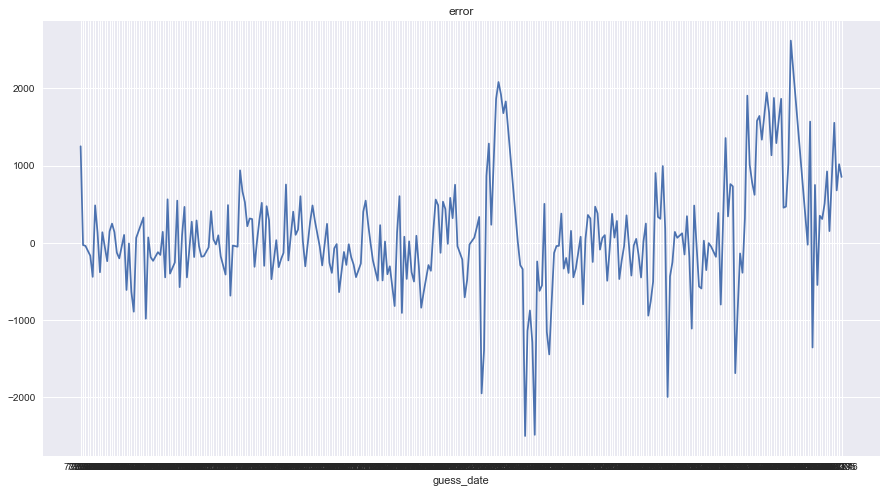

In [49]:
# plt.plot(test_A_df['guess_date'].values, test_A_df['predict_error'])
# test_A_df['x_month'] = test_A_df['guess_date'].map(lambda x: datetime.strftime(x, '%Y-%m-%d'))

import matplotlib.dates as mdate
fig1 = plt.figure(figsize=(15,8))
# ax1 = fig1.add_subplot(1,1,1)
# ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m'))
plt.xlabel('guess_date')
plt.xticks(pd.date_range('2016-04-07','2017-02-16'))#设置时间标签显示格式
plt.title('error')
plt.plot(test_A_df['guess_date'], test_A_df['predict_error'])
plt.show()

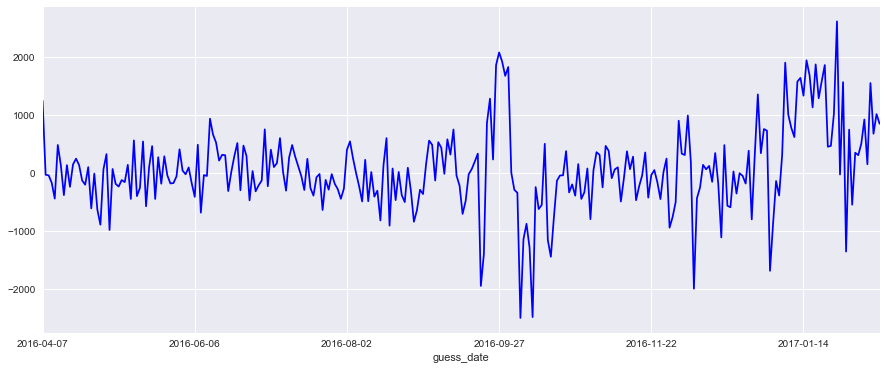

In [56]:
# plt.plot(test_A_df['guess_date'].values, test_A_df['predict_error'])
# test_A_df['x_month'] = test_A_df['guess_date'].map(lambda x: datetime.strftime(x, '%Y-%m-%d'))
drawDf = test_A_df.set_index('guess_date')['predict_error']
fig, ax = plt.subplots(figsize=(15,6))
drawDf.plot(ax=ax, style='b-')
plt.show()
# import matplotlib.dates as mdate
# fig1 = plt.figure(figsize=(15,8))
# # ax1 = fig1.add_subplot(1,1,1)
# # ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m'))
# plt.xlabel('guess_date')
# plt.xticks(pd.date_range('2016-04-07','2017-02-16'))#设置时间标签显示格式
# plt.title('error')
# plt.plot(test_A_df['guess_date'], test_A_df['predict_error'])
# plt.show()